In [2]:
library(ggplot2)

In [3]:
filename = '/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.diff_efficiency_by_cell_line.tsv'
diff_df = read.csv(filename,sep='\t')
nrow(diff_df)
head(diff_df)

[1] 199

donor_id,diff_efficiency
HPSI0114i-bezi_3,0.58269720
HPSI0114i-eipl_1,0.01287835
HPSI0114i-fikt_3,0.40282686
HPSI0114i-kolf_2,0.47059133
HPSI0114i-lexy_2,0.72690535
HPSI0114i-posc_1,0.81349206


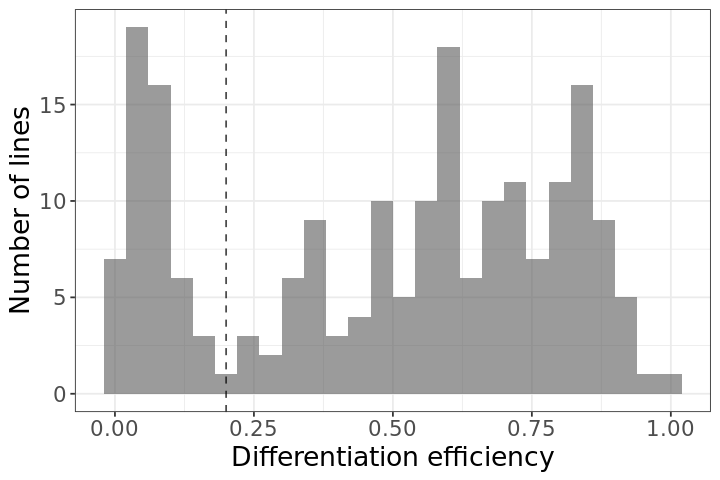

In [4]:
options(repr.plot.width=6, repr.plot.height=4)
x = 0.2
ggplot(diff_df, aes(x = diff_efficiency)) + geom_histogram(alpha = 0.6, binwidth = 0.04) + 
#     coord_cartesian(ylim = c(0, 2000), xlim(c(-0.6,0.6)) +
    xlab("Differentiation efficiency") + ylab("Number of lines") +
    geom_vline(xintercept = x, linetype="dashed", alpha = 0.7) +
    theme_bw() + theme(text = element_text(size=16))

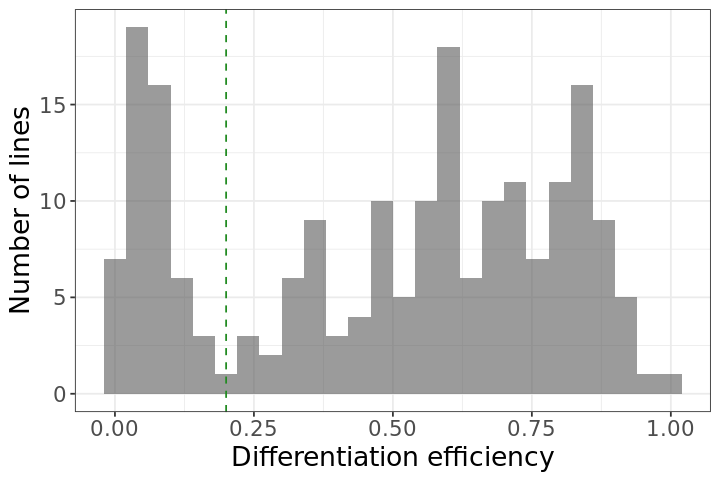

In [11]:
options(repr.plot.width=6, repr.plot.height=4)
x = 0.2
ggplot(diff_df, aes(x = diff_efficiency)) + geom_histogram(alpha = 0.6, binwidth = 0.04) + 
#     coord_cartesian(ylim = c(0, 2000), xlim(c(-0.6,0.6)) +
    xlab("Differentiation efficiency") + ylab("Number of lines") +
    geom_vline(xintercept = x, linetype="dashed", col = "forestgreen") +
    theme_bw() + theme(text = element_text(size=16))

In [5]:
# filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/analysis_results/20200103_data_freeze/differentiation_trajectories/differentiation_efficiency_predictive_model_scores.tsv"
filename = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/analysis_results/20200907_data_freeze/differentiation_trajectories/differentiation_efficiency_predictive_model_scores.tsv"
score_df = read.csv(filename, sep = "\t")
head(score_df)

donor_id,diff_efficiency,diff_outcome,model_score,model_predicted_outcome
HPSI0114i-bezi_1,NA,not_assessed,0.795830284,success
HPSI0114i-bezi_3,0.58269720,success,0.990335903,success
HPSI0114i-eipl_1,0.01287835,failure,0.008453323,failure
HPSI0114i-eipl_3,NA,not_assessed,0.009314145,failure
HPSI0114i-fikt_3,0.40282686,success,0.950780075,success
HPSI0114i-iisa_1,NA,not_assessed,0.981784364,success


In [6]:
colnames(score_df)[2] = 'in_study'
head(score_df)

donor_id,in_study,diff_outcome,model_score,model_predicted_outcome
HPSI0114i-bezi_1,NA,not_assessed,0.795830284,success
HPSI0114i-bezi_3,0.58269720,success,0.990335903,success
HPSI0114i-eipl_1,0.01287835,failure,0.008453323,failure
HPSI0114i-eipl_3,NA,not_assessed,0.009314145,failure
HPSI0114i-fikt_3,0.40282686,success,0.950780075,success
HPSI0114i-iisa_1,NA,not_assessed,0.981784364,success


In [7]:
nrow(df)

NULL

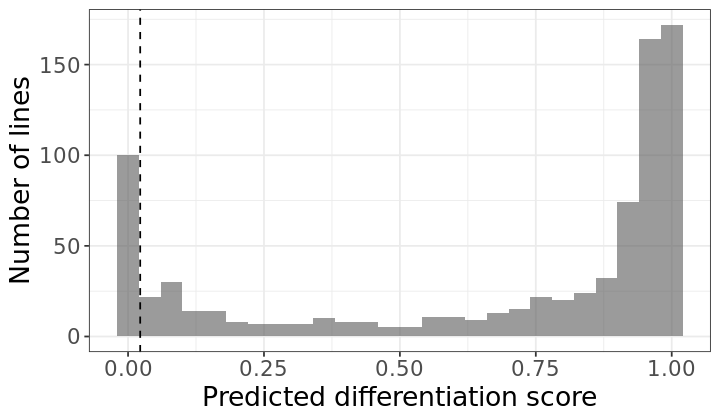

In [10]:
options(repr.plot.width=6, repr.plot.height=3.5)
x = 0.02231
ggplot(score_df, aes(x = model_score)) + geom_histogram(alpha = 0.6, binwidth = 0.04) + 
#     coord_cartesian(ylim = c(0, 2000), xlim(c(-0.6,0.6)) +
    xlab("Predicted differentiation score") + ylab("Number of lines") +
    geom_vline(xintercept = x, linetype="dashed", col = "black") +
    theme_bw() + theme(text = element_text(size=16))

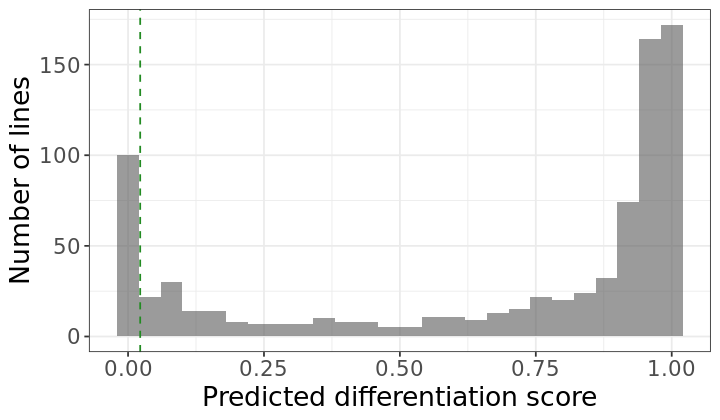

In [9]:
options(repr.plot.width=6, repr.plot.height=3.5)
x = 0.02231
ggplot(score_df, aes(x = model_score)) + geom_histogram(alpha = 0.6, binwidth = 0.04) + 
#     coord_cartesian(ylim = c(0, 2000), xlim(c(-0.6,0.6)) +
    xlab("Predicted differentiation score") + ylab("Number of lines") +
    geom_vline(xintercept = x, linetype="dashed", col = "forestgreen") +
    theme_bw() + theme(text = element_text(size=16))

In [26]:
library(dplyr)
df = left_join(score_df, diff_df)
head(df)

Joining, by = "donor_id"
Warning message:
“Column `donor_id` joining factors with different levels, coercing to character vector”

donor_id,in_study,model_score,diff_efficiency
HPSI0114i-bezi_1,not_assessed,0.959917254,NA
HPSI0114i-bezi_3,succeeded,0.994178186,0.58269720
HPSI0114i-eipl_1,failed,0.005722711,0.01287835
HPSI0114i-eipl_3,not_assessed,0.007677837,NA
HPSI0114i-fikt_3,succeeded,0.965656771,0.40282686
HPSI0114i-iisa_1,not_assessed,0.974303824,NA


In [27]:
# supp_tables_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuroseq_ms/supp_tables/"
# filename = paste0(supp_tables_dir,"SuppTable5_predicted_differentiation_efficiency_scores_for_all_hipsci_lines.csv")
# write.csv(df,filename, quote = F, row.names = F)

In [28]:
supp_tables_dir = "/hps/nobackup/stegle/users/acuomo/all_scripts/sc_neuroseq/neuroseq_ms/supp_tables/natgen/"
filename = paste0(supp_tables_dir,"SuppTable5_predicted_differentiation_efficiency_scores_for_all_hipsci_lines.csv")
write.csv(df,filename, quote = F, row.names = F)